<h1 style="color:#06f"> Recruit Restaurant Visitor Forecasting</h1>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<h2 align=right>10조 - 쉽죠?</h2>
<h3 align=right>김정은, 김호성, 박경은, 장수완</h3>

<h1 style="color:#06f">목표</h1>

<h3 style="color:#06f">- 사이트의 예약, 방문 및 기타 정보를 사용하여 주어진 날짜 (2017년 4월과 5월의 마지막 주)에 향후 레스토랑 방문자 수를 예측</h3>
<img src = "img/Artboard 1 copy 2@4x.png" width="1920px" height="1080px"/>

<h1 style="color:#06f">- 데이터 셋에 대한 간략한 설명</h1>

<h3 style="color:#06f">- 데이터 설명</h3><br/></br/>

#두 개의 개별 사이트에서 가져오는 데이터
- Hot Pepper Gourmet(hpg)<br/>
  Yelp와 유사, 사용자가 레스토랑을 검색하고 온라인으로 예약하는 시스템<br/><br/>
- AirREGI/레스토랑 보드(에어)<br/>
  스퀘어와 유사, 예약 제어 및 금전 등록 시스템<br/><br/>        

<h3 style="color:#06f">- 주의할점</h3><br/><br/> 
 
- 훈련 데이터는 2016년부터 2017년 4월까지의 날짜를 포함<br/> 
- 테스트 세트는 시간을 기준으로 분할<br/>  (공개 폴드가 먼저, 비공개 폴드가 공개 다음에 옴)<br/> 
- 테스트 세트는 의도적으로 "골든 위크"라고 불리는 일본의 휴일 주간에 걸쳐 있음<br/> 
- 테스트 세트에는 레스토랑이 문을 닫고 방문자가 없는 날이 있었음. <br/> 스코어링 시 무시됨.  훈련 세트는 레스토랑이 문을 닫는 날을 생략<br/> <br/> 

<h3 style="color:#06f">- 파일 설명</h3>

- 두 시스템의 관계형 데이터 세트
- 각 레스토랑은 고유 air_store_id하고 hpg_store_id를 갖고 있음
- 위도와 경도는 식당의 비식별화를 막는 데 정확하지 않음

<strong>1. air_visit_data.csv</strong>: 항공 레스토랑에 대한 과거 방문 데이터가 포함
- air_store_id - 항공 시스템의 레스토랑의 id
- visit_date - 날짜
- visitors - 해당 날짜의 레스토랑 방문자 수 


<strong>2. air_store_info.csv</strong>: 일부 항공 레스토랑에 대한 정보가 포함
- air_store_id - 항공 시스템의 레스토랑의 id
- air_genre_name - 레스토랑의 카테고리
- air_area_name - 레스토랑이 위치한 지역이름
- reserve_datetime  - 예약한 시간
- reserve_visitors - 해당 예약의 방문자 수

<strong>3. hpg_store_info.csv</strong>: 일부 hpg 레스토랑에 대한 정보가 포함
- hpg_store_id - hpg 시스템의 레스토랑 id
- hpg_genre_name - hpg시스템의 레스토랑 카테고리 
- hpg_area_name - hpg시스템의 레스토랑이 위치한 지역이름
- latitude - 레스토랑이 위치한 위도
- longitude - 레스토랑이 위치한 경도

<strong>4. air_reserve.csv</strong>: 항공 시스템에서 이루어진 예약
- air_store_id - 항공 시스템의 레스토랑의 id
- visit_datetime - 예약 시간
- reserve_datetime - 예약한 시간
- reserve_visitors - 해당 예약의 방문자 수

<strong>5. hpg_reserve.csv</strong>: hpg 시스템에서 이루어진 예약
- hpg_store_id - hpg 시스템의 레스토랑 id
- visit_datetime - 예약 시간
- reserve_datetime - 예약한 시간
- reserve_visitors - 해당 예약의 방문자 수

<strong>6. store_id_relation.csv</strong>: 항공 시스템과 hpg 시스템 모두를 쓰는 레스토랑 정보
- hpg_store_id - hpg 시스템의 레스토랑 id
- air_store_id - 항공 시스템의 레스토랑의 id

<strong>7. sample_submission.csv</strong>: 제출해야하는 파일
- id는 air_store_idand visit_date를 밑줄로 연결하여 구성
- visitors - 매장 및 날짜 조합에 대한 예상 방문자 수

<strong>8. date_info.csv</strong>: 데이터세트의 달력 날짜에 대한 기본 정보
- calendar_date - 달력 날짜
- day_of_week - 요일
- holiday_flg - 일본의 휴일

<h1 style="color:#06f">- 데이터 분석을 위한 생각들</h1>

<h3 style="color:#06f">- 고객이 식당에 방문하게 되는 경로</h3>
<img src = "img/Artboard 1@4x.png" width="1920px" height="1080px"/>

<h3 style="color:#06f">- 고객이 식당 방문을 결정짓는 여러가지 요인들</h3>

<img src = "img/Artboard 1 copy@4x.png" width="1920px" height="1080px"/>

<h1 style="color:#06f">- 필요한 라이브러리 불러오기</h1>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.ndimage.interpolation import shift
from scipy.stats.mstats import gmean
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D
import tensorflow as tf
from math import sqrt, floor
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import Image
import copy
import warnings
from tensorflow.keras.layers import GRU
warnings.filterwarnings('ignore')

# 결과 재생산을 위한 시드값 고정
np.random.seed(7)
tf.random.set_seed(7)

<h1 style="color:#06f">- 데이터 셋 읽어오기</h1>

In [4]:
data = {
    'air_visit': pd.read_csv('/users/ho/desktop/data/restaurant/air_visit_data.csv'),
    'air_store': pd.read_csv('/users/ho/desktop/data/restaurant/air_store_info.csv'),
    'hpg_store': pd.read_csv('/users/ho/desktop/data/restaurant/hpg_store_info.csv'),
    'air_reserve': pd.read_csv('/users/ho/desktop/data/restaurant/air_reserve.csv'),
    'hpg_reserve': pd.read_csv('/users/ho/desktop/data/restaurant/hpg_reserve.csv'),
    'id': pd.read_csv('/users/ho/desktop/data/restaurant/store_id_relation.csv'),
    'tes': pd.read_csv('/users/ho/desktop/data/restaurant/sample_submission.csv'),
    'date_info': pd.read_csv('/users/ho/desktop/data/restaurant/date_info.csv').rename(columns={'calendar_date':'visit_date'})
}
data_orig=copy.deepcopy(data)

<h1 style="color:#06f">- 데이터 EDA, 전처리</h1>

<h3 style="color:#06f">- pd.merge : 기준열을 기준으로 합칠 때</h3>
<br/><br/>
<img src = "https://2.bp.blogspot.com/-7tZIwP6wp5o/XGKyofu6SoI/AAAAAAAANx4/W5znL7so_tcCtaXuLYs9PCbvMa2AZIH0wCLcBGAs/s640/flow_pandas_merge.png" width="650px" height="300px"/>

<h3 style="color:#06f">- 기준열 이름이 같을 때</h3><br/>
<strong>pd.merge(left, right, on = '기준열', how = '조인방식')</strong>

    - left : 왼쪽 데이터프레임    
    - right : 오른쪽 데이터프레임    
    - on : (두 데이터프레임의 기준열 이름이 같을 때) 기준열    
    - how : 조인 방식 {'left', 'right', 'inner', 'outer'} 기본값은 'inner'
<h3 style="color:#06f">- 기준열 이름이 다를 때</h3><br/>
<strong>pd.merge(left, right, left_on = '왼쪽 열', right_on = '오른쪽 열', how = '조인방식')</strong>

    - left_on : 기준열 이름이 다를 때, 왼쪽 기준열    
    - right_on : 기준열 이름이 다를 때, 오른쪽 기준열
<br/>       

<h3 style="color:#06f">1. on = '기준열'</h3><br/>

- 공통이 되는 기준 열이 여러 개일 때<br/>

<h3 style="color:#06f">2. how = JOIN 방식</h3><br/>
<br/><img src = "https://miro.medium.com/max/1400/1*9eH1_7VbTZPZd9jBiGIyNA.png" width="450px" height="300px"/><br/><br/>

<h1 style="color:#06f">- 데이터 전처리 및 EDA</h1>

<h3 style="color:#06f">1. 예약 인원수 대비 방문자 수</h3><br/>

예약 인원수가 일정 부분을 넘는 가게는 방문자수가 더 많다.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


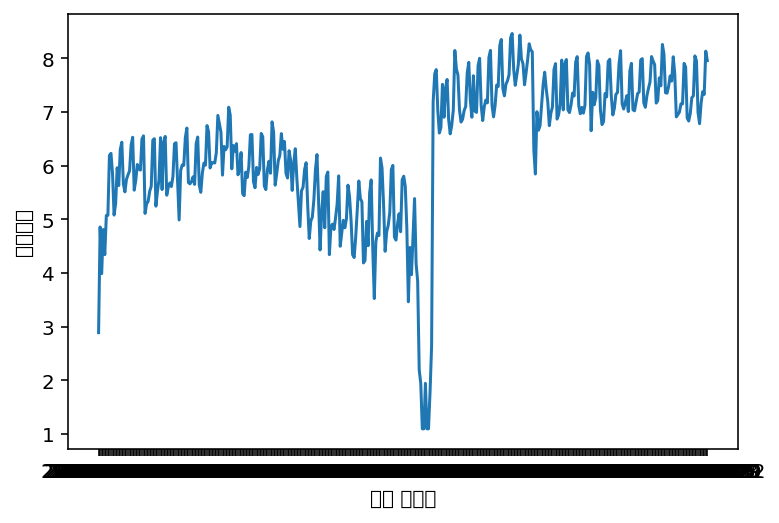

In [5]:
reserve_visit = copy.deepcopy(data_orig['air_reserve'])
reserve_visit['visit_datetime'] = reserve_visit['visit_datetime'].apply(lambda x : str(x[:10]))
reserve_visit['reserve_datetime'] = reserve_visit['reserve_datetime'].apply(lambda x : str(x[:10]))
reserve_visit = reserve_visit.groupby('visit_datetime').sum()
visitors = copy.deepcopy(data_orig['air_visit'])
visitors = visitors.groupby('visit_date').sum()['visitors']

reserve_visit['visitors'] = visitors
reserve_visit = reserve_visit.dropna()

plt.plot(np.log1p(reserve_visit['reserve_visitors'])), np.log1p(reserve_visit['visitors'])

plt.xlabel('예약 인원수')
plt.ylabel('방문자수')

plt.show()

<h3 style="color:#06f">2. hpg_reserve의 id를 중심으로 store_id_relation의 id를 병합</h3><br/>

In [6]:
data['hpg_reserve'] = pd.merge(data['hpg_reserve'], data['id'], how='inner', on=['hpg_store_id'])
data['hpg_reserve'].head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926


----------------------------------------------------------------------------------------------------------------------
<h3 style="color:#06f">4. air_reserve, hpg_reserve 두 개의 데이터 프레임을 묶어서</h3><br/>
1. visit_datetime과 reserve_datetime의 date에 해당하는 정보를 정수화<br/>
2. visit_datetime과 reserve_datetime의 날짜 차를 계산하여 reserve_datetime_diff 데이터에 담아줌(예약날짜와 방문날짜의 차를 확인하기 위함)<br/>
3. 변수 tmp1에 air_store_id와 visit_datetime를 그룹으로 묶어서 reserve_datetime_diff, reserve_visitors의 합계를 계산하여 각각 visitdatetime은 vistit_date, reserve_datetime_diff는 rs1, reserve_visitors는 rv1으로 컬럼명을 변경<br/>
4. 변수 tmp2에 air_store_id와 visit_datetime를 그룹으로 묶어서 reserve_datetime_diff, reserve_visitors의 평균값을 계산하여 각각 visitdatetime은 vistit_date, reserve_datetime_diff는 rs2, reserve_visitors는 rv2으로 컬럼명을 변경<br/>
5. air_reserve, hpg_reserve 두 개의 데이터 프레임에 생성한 tmp1, tmp2를 air_store_id, visit_date를 중심으로 합침<br/>

In [7]:
for df in ['air_reserve','hpg_reserve']:
    data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])
    data[df]['visit_datetime'] = data[df]['visit_datetime'].dt.date
    data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
    data[df]['reserve_datetime'] = data[df]['reserve_datetime'].dt.date
    data[df]['reserve_datetime_diff'] = data[df].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    tmp1 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1'}) #합계
    tmp2 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2'}) #평균값
    data[df] = pd.merge(tmp1, tmp2, how='inner', on=['air_store_id','visit_date'])

In [8]:
tmp1

,air_store_id,visit_date,rs1,rv1
0,air_00a91d42b08b08d9,2016-01-14,3,2
1,air_00a91d42b08b08d9,2016-01-15,6,4
2,air_00a91d42b08b08d9,2016-01-16,3,2
3,air_00a91d42b08b08d9,2016-01-22,3,2
4,air_00a91d42b08b08d9,2016-01-29,6,5
...,...,...,...,...
18615,air_fea5dc9594450608,2017-04-21,2,2
18616,air_fea5dc9594450608,2017-04-22,0,2
18617,air_fea5dc9594450608,2017-04-25,9,2
18618,air_fea5dc9594450608,2017-04-28,29,3


In [9]:
tmp2

,air_store_id,visit_date,rs2,rv2
0,air_00a91d42b08b08d9,2016-01-14,3.0,2.0
1,air_00a91d42b08b08d9,2016-01-15,6.0,4.0
2,air_00a91d42b08b08d9,2016-01-16,3.0,2.0
3,air_00a91d42b08b08d9,2016-01-22,3.0,2.0
4,air_00a91d42b08b08d9,2016-01-29,6.0,5.0
...,...,...,...,...
18615,air_fea5dc9594450608,2017-04-21,2.0,2.0
18616,air_fea5dc9594450608,2017-04-22,0.0,2.0
18617,air_fea5dc9594450608,2017-04-25,9.0,2.0
18618,air_fea5dc9594450608,2017-04-28,29.0,3.0


## 2.월별 방문자수 시각화

- y = 방문자수
- x = 월

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


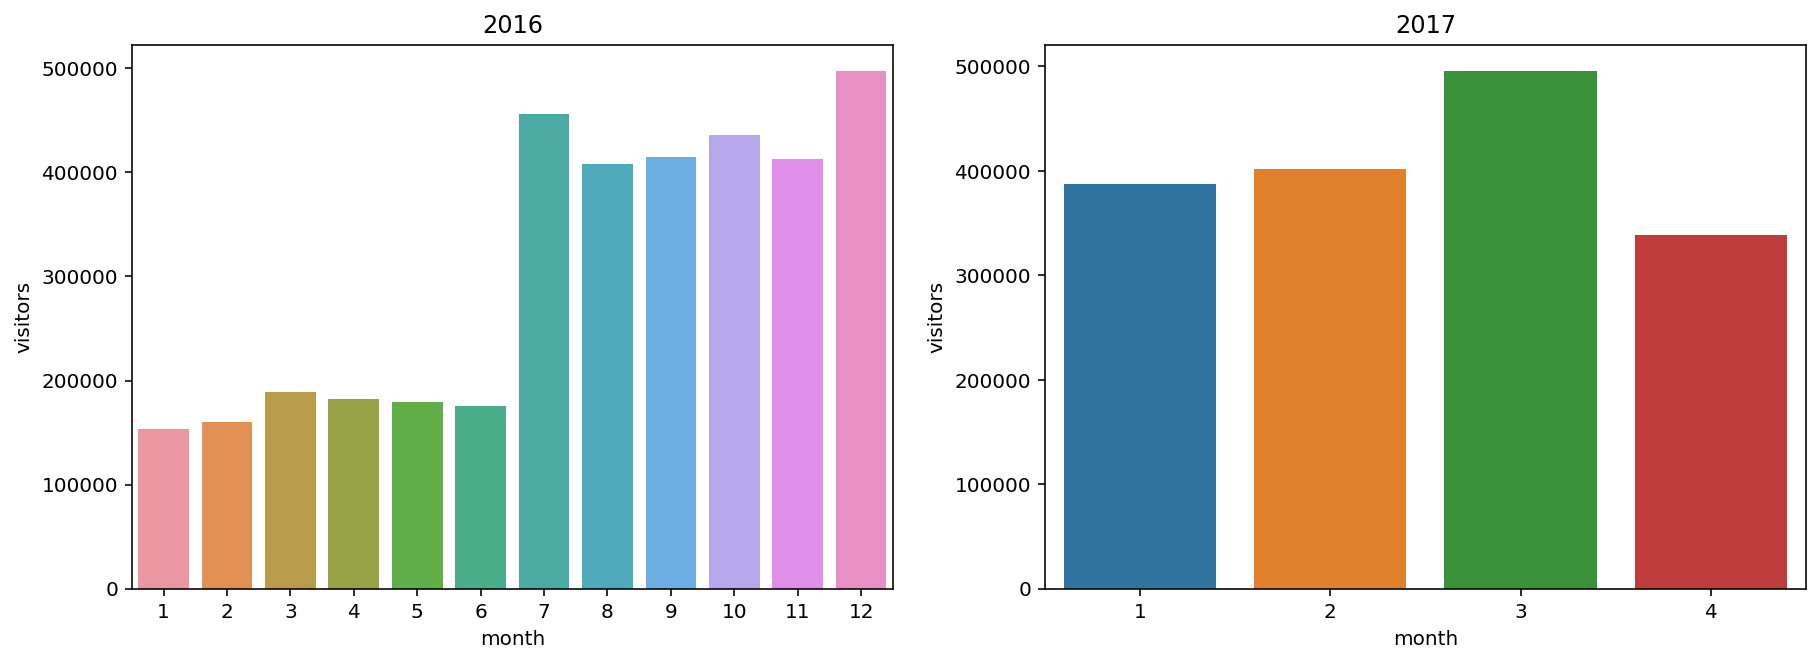

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data_orig['air_visit']['year'] = pd.to_datetime(data_orig['air_visit']['visit_date']).dt.year
data_orig['air_visit']['month'] = pd.to_datetime(data_orig['air_visit']['visit_date']).dt.month
year = data_orig['air_visit']
year_2016 = data_orig['air_visit'][year['year'] == 2016]
year_2017 = data_orig['air_visit'][year['year'] == 2017]


for i, year in enumerate([year_2016, year_2017]):
    year_visitors = year.groupby('month').aggregate(sum).sort_values('month', ascending=False) 
    sns.barplot(x = year_visitors.index, y = 'visitors', data = year_visitors, ax=ax[i])
    
ax[0].set_title("2016")
ax[1].set_title("2017")

plt.show()

<h3 style="color:#06f">5. air_visit의 visit_date를 datetime으로 변환 후 요일, 년도, 월, 일로 칼럼을 추가하여 정보를 정수로 변환</h3><br/>

In [11]:
data['air_visit']['visit_date'] = pd.to_datetime(data['air_visit']['visit_date'])
data['air_visit']['dow'] = data['air_visit']['visit_date'].dt.dayofweek
data['air_visit']['year'] = data['air_visit']['visit_date'].dt.year
data['air_visit']['month'] = data['air_visit']['visit_date'].dt.month
data['air_visit']['visit_date'] = data['air_visit']['visit_date'].dt.date

data['air_visit'].head()

,air_store_id,visit_date,visitors,dow,year,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1


<h3 style="color:#06f">6. sample_submission.csv 데이터에 날짜 컬럼 전처리 및 추가</h3><br/> 

- to_datetime 메소드에 관한 설명  
https://wikidocs.net/50959  
01/01/2015,2:00 -> 2015-01-01 02:00:00  
위와 같은 형식으로 바꿔주는 메소드다.

-dayofweek 메소드  
월요일:0, 화요일:1, 수요일:2, 목요일:3, 금요일:4, 토요일:5, 일요일:6
r
- rpd.dt.* 메소드에 관한 설명  
https://moondol-ai.tistory.com/180  
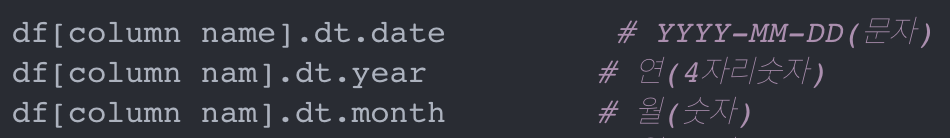

In [12]:
# id에서 상점 id와 날짜 2번째 _를 기준으로 분리
data['tes']['visit_date'] = data['tes']['id'].map(lambda x: str(x).split('_')[2])
data['tes']['air_store_id'] = data['tes']['id'].map(lambda x: '_'.join(x.split('_')[:2]))

# 날짜 컬럼 to_datetime 적용(date 데이터로 해줘야함)
data['tes']['visit_date'] = pd.to_datetime(data['tes']['visit_date'])

# 날짜 컬럼에 dayofweek 메소드를 적용해 요일 컬럼 추가
data['tes']['dow'] = data['tes']['visit_date'].dt.dayofweek

# 년, 월 데이터 컬럼 추가
data['tes']['year'] = data['tes']['visit_date'].dt.year
data['tes']['month'] = data['tes']['visit_date'].dt.month


In [13]:
type(data['tes']['visit_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# dt.date 메소드로 type 변환(Timestamp type -> datetime.date type)
data['tes']['visit_date'] = data['tes']['visit_date'].dt.date

In [15]:
type(data['tes']['visit_date'][0])

datetime.date

In [16]:
data['tes']

,id,visitors,visit_date,air_store_id,dow,year,month
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4
...,...,...,...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0,2017-05-27,air_fff68b929994bfbd,5,2017,5
32015,air_fff68b929994bfbd_2017-05-28,0,2017-05-28,air_fff68b929994bfbd,6,2017,5
32016,air_fff68b929994bfbd_2017-05-29,0,2017-05-29,air_fff68b929994bfbd,0,2017,5
32017,air_fff68b929994bfbd_2017-05-30,0,2017-05-30,air_fff68b929994bfbd,1,2017,5


<h3 style="color:#06f">7. 상점 데이터프레임 stores 생성</h3><br/>

##### - ignore_index
DataFrame에 Series를 '좌+우'로 합칠 때  
ignore_index=True: 열 이름(column name) 무시하고 정수 번호 자동 부여

##### - reset_index
전처리 과정에 인덱스가 뒤죽박죽 섞인 경우에 인덱스를 다시 정해준다.   
https://yganalyst.github.io/data_handling/Pd_2/

##### - groupby.agg
https://rfriend.tistory.com/392  


In [18]:
'''
plt.figure(figsize=(25,8))
genre=train.groupby(['air_genre_name'],as_index=False)['visitors'].sum()
genre.sort_values(by='visitors', ascending=False, inplace=True)
genre['air_genre'] =[i for i,x in enumerate(genre['air_genre_name'])] 
genre = genre.sort_values(by='visitors', ascending=False)
sns.barplot(genre['air_genre'],genre['visitors'],label='visitors')
plt.xticks(range(15), ["Izakaya", 'Cafe/Sweets', "Italian", "Dining bar", "Japanses", "Bar", "Other", "Korean", "Western", "Creative cuisine", "Okonomiyaki", "O", "Asian", "Karaoke", "International cuisine"],fontsize=15)
plt.title("상점 카테고리 별 전체 방문자")
plt.xlabel('')
plt.ylabel('방문자수')
'''

'\nplt.figure(figsize=(25,8))\ngenre=train.groupby([\'air_genre_name\'],as_index=False)[\'visitors\'].sum()\ngenre.sort_values(by=\'visitors\', ascending=False, inplace=True)\ngenre[\'air_genre\'] =[i for i,x in enumerate(genre[\'air_genre_name\'])] \ngenre = genre.sort_values(by=\'visitors\', ascending=False)\nsns.barplot(genre[\'air_genre\'],genre[\'visitors\'],label=\'visitors\')\nplt.xticks(range(15), ["Izakaya", \'Cafe/Sweets\', "Italian", "Dining bar", "Japanses", "Bar", "Other", "Korean", "Western", "Creative cuisine", "Okonomiyaki", "O", "Asian", "Karaoke", "International cuisine"],fontsize=15)\nplt.title("상점 카테고리 별 전체 방문자")\nplt.xlabel(\'\')\nplt.ylabel(\'방문자수\')\n'

In [19]:
# air_store 종류별 변수 선언(unique 메소드로 값 중복 행 제거)
unique_stores = data['tes']['air_store_id'].unique()

# 상점별 데이터프레임 stores 요일별로 생성
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

# stores 데이터프레임에 필요한 데이터를 위한 tmp 변수 생성
tmp = data['air_visit'].groupby(['air_store_id','dow']).agg({'visitors' : [np.min,np.mean,np.median,np.max,np.size]}).reset_index()
tmp.columns = ['air_store_id', 'dow', 'min_visitors', 'mean_visitors', 'median_visitors','max_visitors','count_observations']

# stores 데이터프레임에 tmp 합치기
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 
# stores 데이터프레임에 air_store_info.csv 합치기
stores = pd.merge(stores, data['air_store'], how='left', on=['air_store_id']) 

# 이름의 /와 - 처리
stores['air_genre_name'] = stores['air_genre_name'].map(lambda x: str(str(x).replace('/',' ')))
stores['air_area_name'] = stores['air_area_name'].map(lambda x: str(str(x).replace('-',' ')))

stores

,air_store_id,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,Italian French,Tōkyō to Chiyoda ku Kudanminami,35.694003,139.753595
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,Italian French,Tōkyō to Minato ku Shibakōen,35.658068,139.751599
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,Izakaya,Tōkyō to Taitō ku Higashiueno,35.712607,139.779996
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,Dining bar,Ōsaka fu Ōsaka shi Nakanochō,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,Cafe Sweets,Ōsaka fu Ōsaka shi Ōhiraki,34.692337,135.472229
...,...,...,...,...,...,...,...,...,...,...,...
5742,air_fea5dc9594450608,6,4.0,11.634146,9.0,35.0,41.0,Other,Shizuoka ken Hamamatsu shi Motoshirochō,34.710895,137.725940
5743,air_fee8dcf4d619598e,6,11.0,30.200000,31.5,43.0,40.0,Italian French,Hyōgo ken Kōbe shi Kumoidōri,34.695124,135.197853
5744,air_fef9ccb3ba0da2f7,6,2.0,10.634146,9.0,30.0,41.0,Japanese food,Hyōgo ken Himeji shi Yasuda,34.815149,134.685353
5745,air_ffcc2d5087e1b476,6,2.0,4.250000,3.5,9.0,8.0,Izakaya,Tōkyō to Minato ku Shibakōen,35.658068,139.751599


In [20]:
# 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능
lbl = LabelEncoder()
for i in range(10):
    stores['air_genre_name'+str(i)] = lbl.fit_transform(stores['air_genre_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
    stores['air_area_name'+str(i)] = lbl.fit_transform(stores['air_area_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
stores['air_genre_name'] = lbl.fit_transform(stores['air_genre_name'])
stores['air_area_name'] = lbl.fit_transform(stores['air_area_name'])

stores.head()

,air_store_id,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,...,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,6,44,35.694003,...,0,0,0,0,0,0,0,0,0,0
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,6,62,35.658068,...,0,0,0,0,0,0,0,0,0,0
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,7,82,35.712607,...,0,0,0,0,0,0,0,0,0,0
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,4,98,34.701279,...,0,0,0,0,0,0,0,0,0,0
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,2,102,34.692337,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data['date_info']

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
...,...,...,...
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0


<h3 style="color:#06f">3. 공휴일과 방문자수</h3><br/>
공휴일이 아닌 날이 공휴일보다 10배 이상 많은데도 불구하고 총 방문자수가 큰 차이 없다.

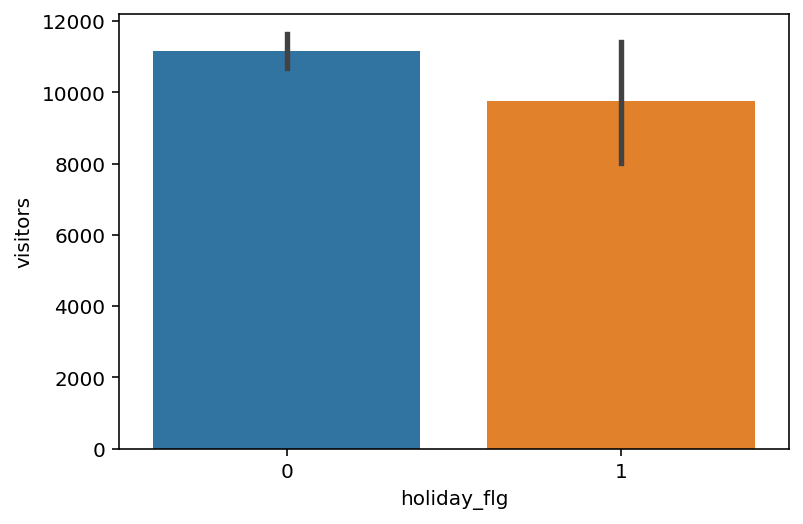

In [22]:
# 공휴일 / 방문자
visit = data_orig['air_visit'].groupby('visit_date').aggregate(sum).sort_values('visit_date', ascending=True)
visit = visit.reset_index()
holiday_visit = copy.deepcopy(data_orig['date_info'])
holiday_visit = pd.concat([holiday_visit, visit], axis=1)
holiday_visit = holiday_visit[:478]

sns.barplot(x = 'holiday_flg', y = 'visitors', data = holiday_visit)

plt.show()

In [23]:
# 모델에 적용하기 위한 문자 전처리
data['date_info']['visit_date'] = pd.to_datetime(data['date_info']['visit_date'])
data['date_info']['day_of_week'] = lbl.fit_transform(data['date_info']['day_of_week'])
data['date_info']['visit_date'] = data['date_info']['visit_date'].dt.date


# train: air_visit(방문자 데이터) + date_info(날짜 정보) + stores(상점별 데이터)
# test: tes(위에서 준비한 submission 데이터) + date_info(날짜 정보) + stores(상점별 데이터)
train = pd.merge(data['air_visit'], data['date_info'], how='left', on=['visit_date']) 
test = pd.merge(data['tes'], data['date_info'], how='left', on=['visit_date']) 

train = pd.merge(train, stores, how='left', on=['air_store_id','dow']) 
test = pd.merge(test, stores, how='left', on=['air_store_id','dow'])

In [24]:
# train, test 데이터에 예약자 정보 columns 추가
for df in ['air_reserve','hpg_reserve']:
    train = pd.merge(train, data[df], how='left', on=['air_store_id','visit_date']) 
    test = pd.merge(test, data[df], how='left', on=['air_store_id','visit_date'])

In [25]:
# train 데이터의 columns 확인
##train.head()
train[['rs1_x', 'rv1_x', 'rs2_x', 'rv2_x', 'rs1_y', 'rv1_y', 'rs2_y', 'rv2_y']].sum()

rs1_x    601206.000000
rv1_x    385916.000000
rs2_x    162189.668959
rv2_x    142684.430268
rs1_y    142861.000000
rv1_y     92187.000000
rs2_y     86178.279102
rv2_y     60366.432165
dtype: float64

In [26]:
# 바로 위에서 train, test 데이터에 추가한 예약자 정보 처리
train['total_reserv_sum'] = train['rv1_x'] + train['rv1_y']
train['total_reserv_mean'] = (train['rv2_x'] + train['rv2_y']) / 2
train['total_reserv_dt_diff_mean'] = (train['rs2_x'] + train['rs2_y']) / 2

test['total_reserv_sum'] = test['rv1_x'] + test['rv1_y']
test['total_reserv_mean'] = (test['rv2_x'] + test['rv2_y']) / 2
test['total_reserv_dt_diff_mean'] = (test['rs2_x'] + test['rs2_y']) / 2

train['latitude']

0         35.658068
1         35.658068
2         35.658068
3         35.658068
4         35.658068
            ...    
252103    35.653217
252104    35.653217
252105    35.653217
252106    35.653217
252107    35.653217
Name: latitude, Length: 252108, dtype: float64

In [27]:
# 데이터 전처리 과정

# 날짜 정보 전처리
train['date_int'] = train['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test['date_int'] = test['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)

# 거리 계산
train['var_max_lat'] = train['latitude'].max() - train['latitude']
train['var_max_long'] = train['longitude'].max() - train['longitude']
test['var_max_lat'] = test['latitude'].max() - test['latitude']
test['var_max_long'] = test['longitude'].max() - test['longitude']

train['lon_plus_lat'] = train['longitude'] + train['latitude'] 
test['lon_plus_lat'] = test['longitude'] + test['latitude']

lbl = LabelEncoder()
train['air_store_id2'] = lbl.fit_transform(train['air_store_id'])
test['air_store_id2'] = lbl.transform(test['air_store_id'])

train = train.fillna(-1)
test = test.fillna(-1)

x_train = train.drop(['air_store_id','visit_date','visitors'], axis=1)
x_test = test.drop(['id','air_store_id','visit_date','visitors'], axis=1)

<h1 style="color:#06f">- Train 데이터 전처리 종료 및 재검토</h1>

Baseline 코드를 캐글에서 찾아 사용했기 때문에 필요없는 데이터가 있지는 않은지 확인할 필요가 있었다.

In [28]:
print("max visits: ", np.max(train['visitors'].values))
print("min visits: ", np.min(train['visitors'].values))

max visits:  877
min visits:  1


visitors의 Max와 Min값의 차이가 크다는 것을 알 수 있다. **Skewness**(왜도)와 **Kurtosis**(첨도)를 알아보고 그에따라 Histogram을 그려보자. 

**Skewness**

데이터 분포의 대칭성이 얼마나 결핍되었는지를 측정한다

skewness가 -0.5 ~ 0,5 일 경우 데이터는 상당히 대칭적이다.<br/>
skewness가 -1 ~ -0.5 이거나 0.5 ~ 1 일 경우 데이터는 적당히 치우쳐있다.<br/>
skewness가 -1보다 작거나 1보다 클 경우 데이터는 상당히 치우쳐있다.<br/>
완전히 대칭인 분포는 skewness가 0이다.

![skew](./images/skew.png)

**Kurtosis**

첨도는 분포 그래프의 꼬리 부분에 관한 것이다

Kurtosis가 높으면 데이터가 두꺼운 꼬리나 outlier를 가지고 있다는 것을 의미<br/>
Kurtosis가 낮으면 데이터가 얇은 꼬리나 outlier를 가지고 있지 않다는 의미<br/>
표준 정규분포는 3의 첨도를 갖는다.<br/>

![kurt](./images/kurt.jpg)

In [29]:
f"왜도 : {train['visitors'].skew()}, 첨도 : {train['visitors'].kurt()}"

'왜도 : 3.307629140143896, 첨도 : 74.25888625830811'

왜도, 첨도값을 참고하여 값을 로그변환 해준다.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


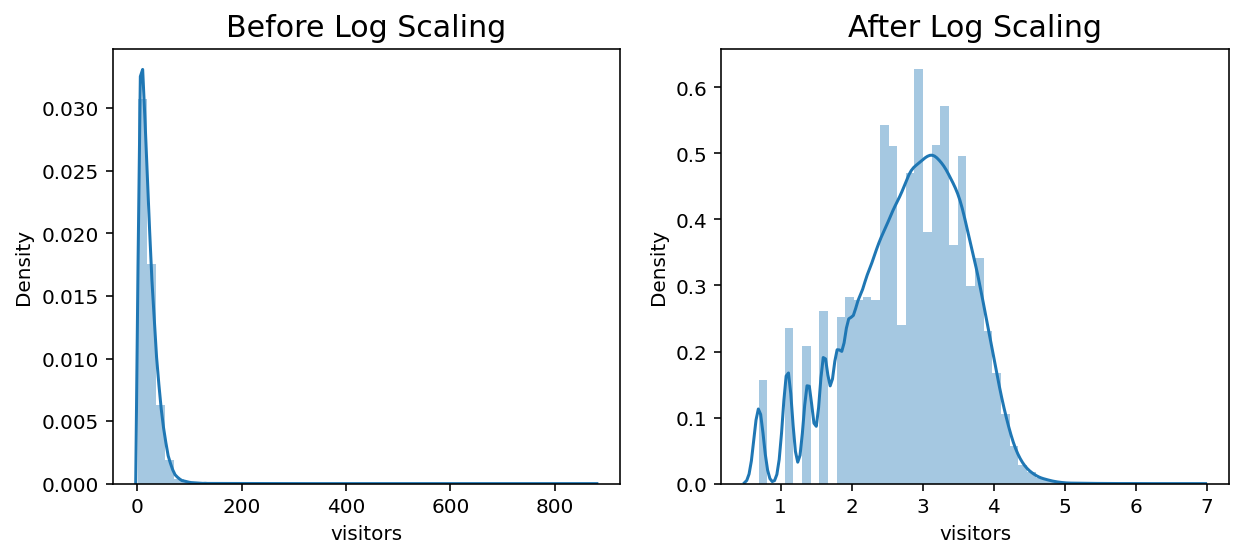

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

sns.distplot(train['visitors'], ax=axes[0])
axes[0].set_title('Before Log Scaling', fontsize=15)
sns.distplot(np.log1p(train['visitors']), ax=axes[1])
axes[1].set_title('After Log Scaling', fontsize=15)
plt.show()

In [31]:
y_train = np.log1p(train['visitors'].values)

In [32]:
x_train.columns, len(x_train.columns)

(Index(['dow', 'year', 'month', 'day_of_week', 'holiday_flg', 'min_visitors',
        'mean_visitors', 'median_visitors', 'max_visitors',
        'count_observations', 'air_genre_name', 'air_area_name', 'latitude',
        'longitude', 'air_genre_name0', 'air_area_name0', 'air_genre_name1',
        'air_area_name1', 'air_genre_name2', 'air_area_name2',
        'air_genre_name3', 'air_area_name3', 'air_genre_name4',
        'air_area_name4', 'air_genre_name5', 'air_area_name5',
        'air_genre_name6', 'air_area_name6', 'air_genre_name7',
        'air_area_name7', 'air_genre_name8', 'air_area_name8',
        'air_genre_name9', 'air_area_name9', 'rs1_x', 'rv1_x', 'rs2_x', 'rv2_x',
        'rs1_y', 'rv1_y', 'rs2_y', 'rv2_y', 'total_reserv_sum',
        'total_reserv_mean', 'total_reserv_dt_diff_mean', 'date_int',
        'var_max_lat', 'var_max_long', 'lon_plus_lat', 'air_store_id2'],
       dtype='object'),
 50)

In [33]:
x_test.columns, len(x_test.columns)

(Index(['dow', 'year', 'month', 'day_of_week', 'holiday_flg', 'min_visitors',
        'mean_visitors', 'median_visitors', 'max_visitors',
        'count_observations', 'air_genre_name', 'air_area_name', 'latitude',
        'longitude', 'air_genre_name0', 'air_area_name0', 'air_genre_name1',
        'air_area_name1', 'air_genre_name2', 'air_area_name2',
        'air_genre_name3', 'air_area_name3', 'air_genre_name4',
        'air_area_name4', 'air_genre_name5', 'air_area_name5',
        'air_genre_name6', 'air_area_name6', 'air_genre_name7',
        'air_area_name7', 'air_genre_name8', 'air_area_name8',
        'air_genre_name9', 'air_area_name9', 'rs1_x', 'rv1_x', 'rs2_x', 'rv2_x',
        'rs1_y', 'rv1_y', 'rs2_y', 'rv2_y', 'total_reserv_sum',
        'total_reserv_mean', 'total_reserv_dt_diff_mean', 'date_int',
        'var_max_lat', 'var_max_long', 'lon_plus_lat', 'air_store_id2'],
       dtype='object'),
 50)

<h3 style="color:#06f">- dow ? day_of_week ?</h3>
<br/>
day_of_week의 약어인 dow가 새로운 컬럼으로 있었다. 분포를 확인해보고 중복되면 제거하자.

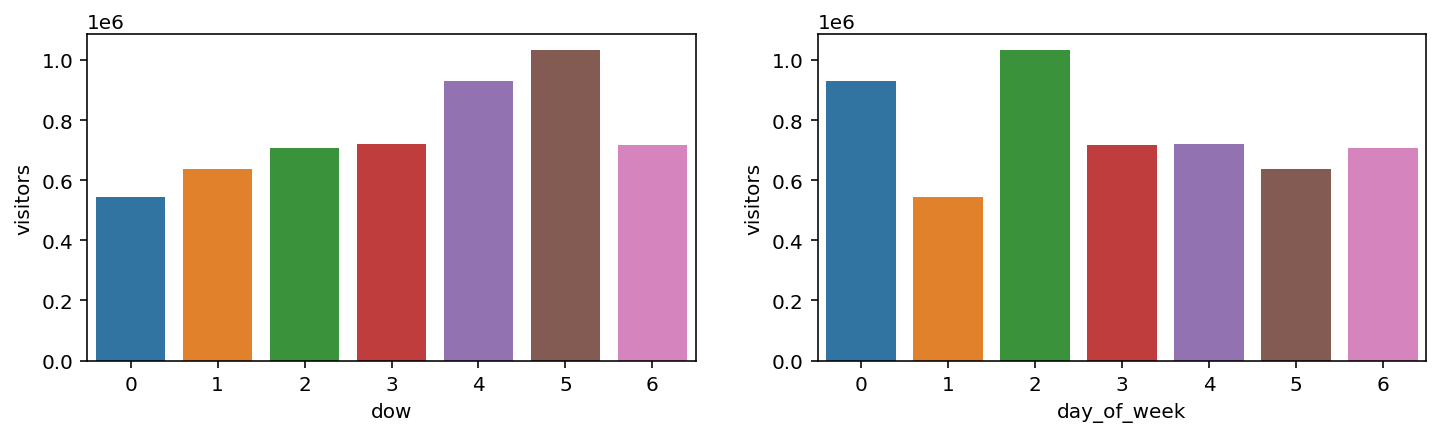

In [34]:
plt.figure(figsize=(12, 3))
dow = train.groupby('dow').aggregate(sum).sort_values('dow', ascending=False)
day_of_week = train.groupby('day_of_week').aggregate(sum).sort_values('dow', ascending=False)
plt.subplot(121)
sns.barplot(dow.index, "visitors", data=dow)
plt.subplot(122)
sns.barplot(day_of_week.index, "visitors", data=day_of_week)
plt.show()

❗ 두개의 데이터가 달라보지만 자세히보면 인덱스만 다른것을 알 수 있다!

In [35]:
sorted(dow['visitors']) == sorted(day_of_week['visitors'])

True

|dow|day of week|
|------|---|
|0|1|
|1|5|
|2|6|
|3|4|
|4|0|
|5|2|
|6|3|

❓ 왜 다를까? 
- `day_of_week`는 LabelEncoder를 통해 정의
- `dow` dt.dayofweek를 통해 정의


**제거!**

In [36]:
x_train.drop(['day_of_week'], inplace=True, axis=1)
x_test.drop(['day_of_week'], inplace=True, axis=1)

<h3 style="color:#06f">- var_max_lat ? var_max_long ? var_max_lat ? var_max_long ? lon_plus_lat ? lon_plus_lat ?</h3>

각각 최대치에서의 차, 위도와 경도의 합을 나타내는 수치인데, 큰 연관성이 없다 판단하여 제거했더니 조금의 성능 향상이 있었다.  0.51977 -> 0.51939

In [37]:
col_lat_long = ['var_max_lat', 'var_max_long', 'lon_plus_lat']
x_train.drop(col_lat_long, inplace=True, axis=1)
x_test.drop(col_lat_long, inplace=True, axis=1)

<h3 style="color:#06f">- 학습 데이터 Scaling</h3>

Scaling : 데이터의 전처리 과정으로 전체 데이터의 분포를 평균 0, 분산 1이 되도록 만드는 과정

- `fit()` : 평균 𝜇과  표준편차 𝜎를 계산
- `transform()`: fit 결과를 통해 정규화를 수행

**❗주의: x_train을 scaling 했다면 동일한 값(𝜇, 𝜎)으로 x_test의 scaling을 수행해야함**

**DataFrame 형태인 x_train을 스케일링하며 학습 가능한 numpy 배열로 형태를 변환해준다.**

In [38]:
scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<h3 style="color:#06f">- 학습 데이터 Scaling</h3>

Scaling : 데이터의 전처리 과정으로 전체 데이터의 분포를 평균 0, 분산 1이 되도록 만드는 과정

- `fit()` : 평균 𝜇과  표준편차 𝜎를 계산
- `transform()`: fit 결과를 통해 정규화를 수행

**❗주의: x_train을 scaling 했다면 동일한 값(𝜇, 𝜎)으로 x_test의 scaling을 수행해야함**

**DataFrame 형태인 x_train을 스케일링하며 학습 가능한 numpy 배열로 형태를 변환해준다.**

In [39]:
#reshape을 통해 3차원으로 만들어 준다.
## LSTM의 입력으로 3차원의 데이터가 필요하기 때문 (data size, time_steps, features)
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1])) #hidden layer추가?
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

print("-- network input --")
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)

-- network input --
X_train:  (252108, 1, 46)
y_train:  (252108,)
X_test:  (32019, 1, 46)


<h1 style="color:#06f">- 모델학습</h1>
<br/>
- WHY LSTM?

<h3 style="color:#06f">- Sequence</h3><br/>

순서가 있는 data를 sequence 라고 한다. 
ex)Text-문맥순서/시계열 데이터-시간순서
- sequence model 을 사용하는 이유
기존에는 모든 input 들이 독립이라고 가정했지만 순차적으로 과거 정보를 반영할 수 있는 모델이 필요했기에 sequence model 을 사용한다.
- Sequence data를 다루는 모델을 Sequence model 이라고 한다.
- 대표적인 Sequence model
RNN,GRU,LSTM 등등
- 이 중에서도 시간적 순서의 영향이 큰 문제에는 LSTM 의 모델이 효과적임
ex)날씨, 주식예측은 최근일 수록 영향이 크다

<h3 style="color:#06f"><br/>=> 미래 날짜의 레스토랑 총 방문자 수를 예측해야 할 때는 예약 및 방문데이터를 이용한다. 이때, 과거 정보를 반영해야 하고 최근 데이터일수록 영향을 많이 받는 LSTM 모델을 사용하는 것이 좋다.</h3>

<h3 style="color:#06f">- Keras 작동방식</h3><br/>
<img src = "img/keras.png" width="1920px" height="1080px"/>

<h3 style="color:#06f">- LSTM의 기본 구조</h3><br/>
- LSTM은 RNN의 종류로 RNN은 긴 기간에 의존하면 학습하는 데 오랜 시간이 걸리고 정보를 얻기 위한 시간 격차가 커진다. 이러한 문제점을 해결하기 위해 만들어진 게 LSTM이다.<br/>
- LSTM은 RNN과 다르게 반복모듈에 4개의 상호작용하는 layer가 들어있다.


<img src = "img/lstm.png" width="1920px" height="1080px"/>

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

history = model.fit(x_train, y_train, epochs=60, batch_size=500, \
                    verbose=2, shuffle=False, validation_split=0.2, callbacks=[es])
get_submission(model, "submission_1.csv")

Epoch 1/60


2021-08-09 20:14:13.136066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-09 20:14:13.260717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-09 20:14:13.311678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-09 20:14:19.612720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-08-09 20:14:19.643214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


404/404 - 8s - loss: 2.1086 - val_loss: 0.3275
Epoch 2/60
404/404 - 8s - loss: 0.3113 - val_loss: 0.2795
Epoch 3/60
404/404 - 7s - loss: 0.2820 - val_loss: 0.2688
Epoch 4/60
404/404 - 6s - loss: 0.2744 - val_loss: 0.2639
Epoch 5/60
404/404 - 6s - loss: 0.2701 - val_loss: 0.2610
Epoch 6/60
404/404 - 6s - loss: 0.2675 - val_loss: 0.2595
Epoch 7/60
404/404 - 6s - loss: 0.2660 - val_loss: 0.2588
Epoch 8/60
404/404 - 6s - loss: 0.2650 - val_loss: 0.2583
Epoch 9/60
404/404 - 6s - loss: 0.2645 - val_loss: 0.2580
Epoch 10/60
404/404 - 7s - loss: 0.2649 - val_loss: 0.2581
Epoch 11/60
404/404 - 6s - loss: 0.2645 - val_loss: 0.2578
Epoch 12/60
404/404 - 7s - loss: 0.2643 - val_loss: 0.2573
Epoch 13/60
404/404 - 6s - loss: 0.2622 - val_loss: 0.2567
Epoch 14/60
404/404 - 8s - loss: 0.2629 - val_loss: 0.2569
Epoch 15/60
404/404 - 7s - loss: 0.2615 - val_loss: 0.2569
Epoch 16/60
404/404 - 7s - loss: 0.2624 - val_loss: 0.2569
Epoch 17/60
404/404 - 7s - loss: 0.2611 - val_loss: 0.2566
Epoch 18/60
404/4

NameError: name 'get_submission' is not defined

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=600, batch_size=500, \
                    verbose=2, shuffle=False, validation_split=0.2, callbacks=[es])
get_submission(model, "submission_17.csv")   ##0.51052

In [ ]:
model = Sequential()
model.add(GRU(8, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=600, batch_size=500, \
                    verbose=2, shuffle=False, validation_split=0.2, callbacks=[es])
get_submission(model, "submission_18.csv")  #0.51411

In [ ]:
model = Sequential()
model.add(LSTM(8, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(3))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=600, batch_size=500, \
                    verbose=2, shuffle=False, validation_split=0.2, callbacks=[es])
get_submission(model, "submission_19.csv")  #0.51514

In [ ]:
model = Sequential()
model.add(GRU(16, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(2))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=600, batch_size=500, \
                    verbose=2, shuffle=False, validation_split=0.2, callbacks=[es])
get_submission(model, "submission_21.csv")  #0.51526

In [ ]:
sub1 = pd.read_csv('/aiffel/aiffel/hackathon/submission_17.csv') # 0.51052
sub2 = pd.read_csv('/aiffel/aiffel/hackathon/submission_20.csv') # 0.51283
sub3 = pd.read_csv('/aiffel/aiffel/hackathon/submission_18.csv') # 0.51411
sub4 = pd.read_csv('/aiffel/aiffel/hackathon/submission_21.csv') # 0.51526


#concatenate target columns on the same Dataframe
preds = pd.concat([sub1['visitors'], sub2['visitors'], 
        sub3['visitors'], sub4['visitors']])
        
        
#Apply geometric mean 
preds = preds.groupby(level=0).apply(gmean)


# Create submission 
print(preds.head)
sub = pd.DataFrame()
sub['id'] = sub1['id']
sub['visitors'] = preds

sub.to_csv('sub_geometric.csv', index = False)  # 0.51084

### Public Score 값 정리

| |LSTM(100)|LSTM8|LSTM16|GRU8|GRU16|
|---|---|---|---|---|---|
|Dense1|0.51791|0.51256|0.51370|0.513|0.51547|
|Dense2|0.5102|0.51283|0.51411|0.51526|

| |LSTM(8,16)/GRU(8,16)|
|-|------|
|Dense1|0.51160|
|Dense2|0.51084|

<h1 style="color:#06f">회고</h1>

<img src = "img/ideas.png" width="1920px" height="1080px"/>

<img src = "img/ideas.png" width="1920px" height="1080px"/>

<img src = "img/kaggle.png" width="1920px" height="1080px"/>

<img src = "img/work.jpg" width="1920px" height="1080px"/>

In [ ]:
!jupyter nbconvert Recruit_Restaurant_Visitor_Forecasting_3_pptVer.ipynb --to slides --post serve